<a href="https://colab.research.google.com/github/malhotraarshdeepsingh/sem_ai/blob/main/finaldraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid", palette="Set2", font_scale=1.1)
plt.rcParams["figure.dpi"] = 120
plt.rcParams["axes.titleweight"] = "bold"
palette = sns.color_palette("Set2")

In [3]:
data = pd.read_csv("customer_segmentation.csv")

In [4]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
data.shape

(2240, 29)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
data.dropna(inplace = True)

In [10]:
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [11]:
data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   174.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2216.000000  ...        2216.000000   2216.000000   2216.000000   
mean         37.637635  ...           5.319043      0.073556      0.074007   
std          54.752082  ...           2.425359      0.261106      0.261842   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2216.000000   2216.000000   2216.000000  2216.000000         2216.0   
mean       0.073105      0.064079      0.013538     0.009477            3.0   
std        0.260367      0.244950      0.115588     0.096907            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2216.0  2216.000000  
mean        11.0     0.150271  
std          0.0     0.357417  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [12]:
data["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [13]:
data["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [14]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst = True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [16]:
data["Age"] = 2025 - data["Year_Birth"]

In [17]:
data["Age"]

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2216, dtype: int64

In [18]:
data["Total_Children"] = data["Kidhome"] + data["Teenhome"]

In [19]:
data["Total_Children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total_Children, Length: 2216, dtype: int64

In [20]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children'],
      dtype='object')

In [21]:
spend_cols =['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [22]:
data["Total_Spending"] = data[spend_cols].sum(axis = 1)

In [23]:
data["Customer_Since"] = (pd.Timestamp("today") - data["Dt_Customer"]).dt.days

In [24]:
data["Customer_Since"]

0       4758
1       4208
2       4407
3       4234
4       4256
        ... 
2235    4476
2236    4114
2237    4250
2238    4251
2239    4717
Name: Customer_Since, Length: 2216, dtype: int64

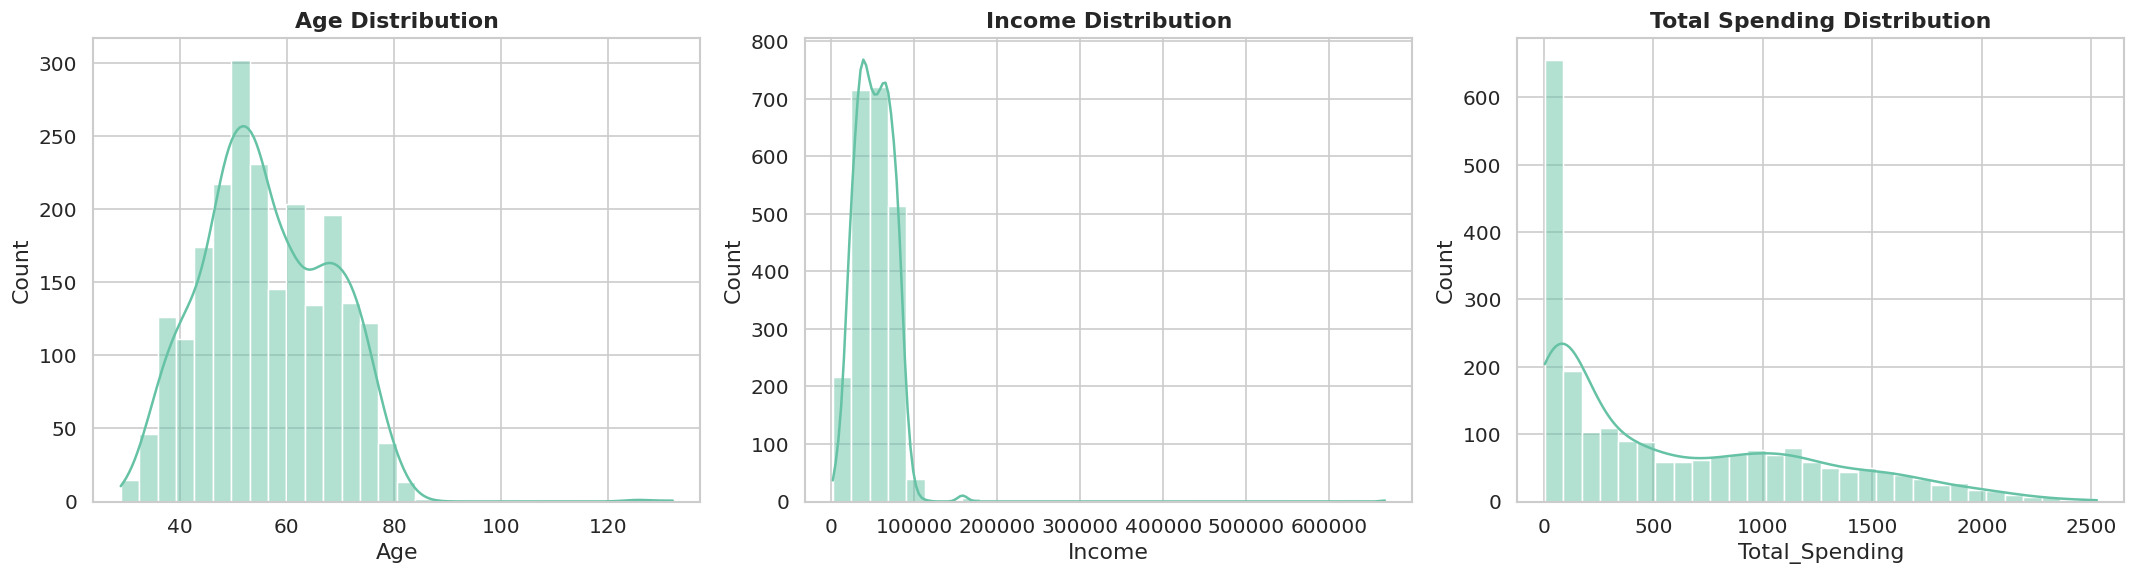

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age Distribution
sns.histplot(data["Age"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

# Income Distribution
sns.histplot(data["Income"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Income Distribution")

# Total Spending Distribution
sns.histplot(data["Total_Spending"], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Total Spending Distribution")

plt.tight_layout()
plt.show()

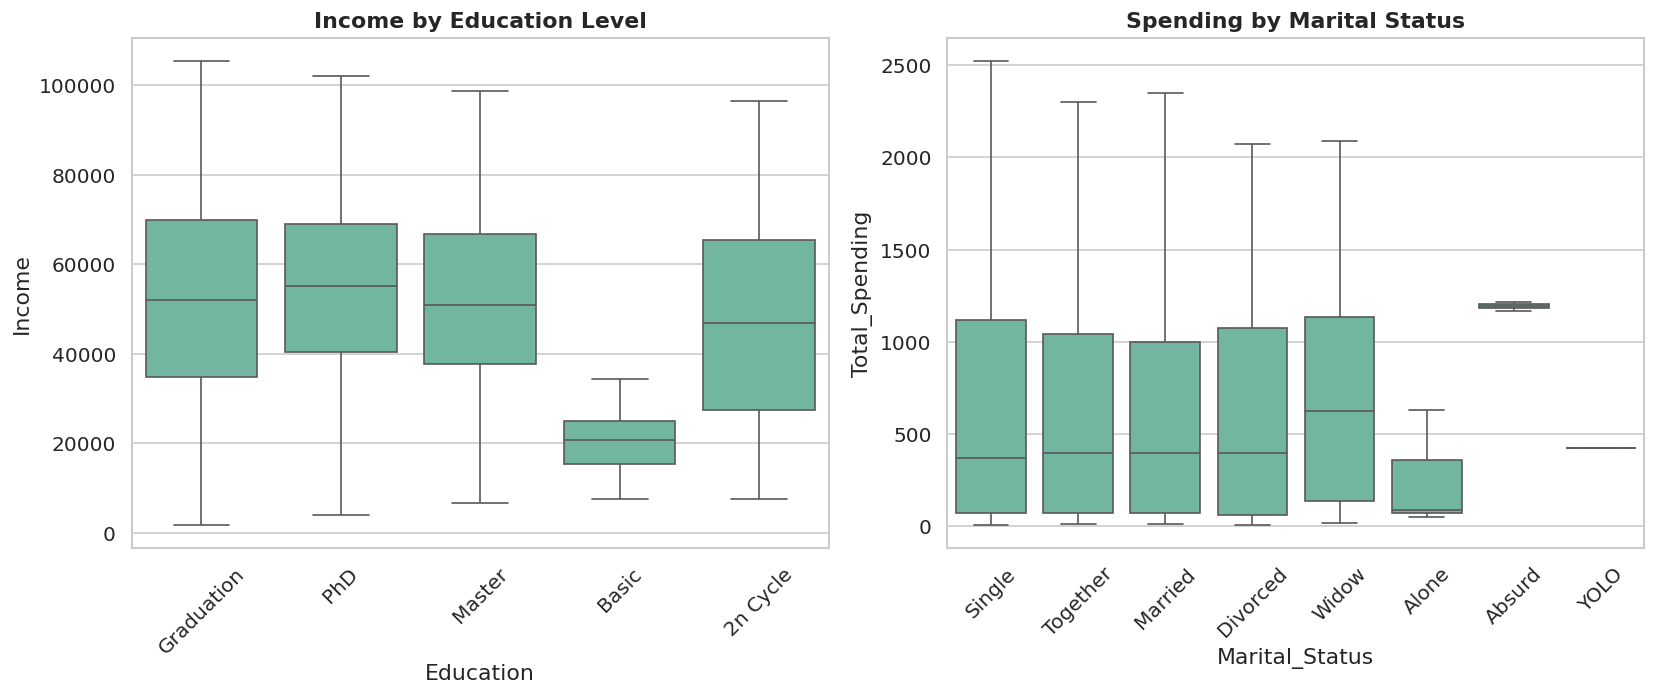

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Income by Education Level (Boxplot)
sns.boxplot(x="Education", y="Income", data=data, ax=axes[0], showfliers=False)
axes[0].set_title("Income by Education Level")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Spending by Marital Status (Boxplot)
sns.boxplot(x="Marital_Status", y="Total_Spending", data=data, ax=axes[1], showfliers=False)
axes[1].set_title("Spending by Marital Status")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [27]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since'],
      dtype='object')

In [28]:
corr = data[["Income", "Age", "Recency", "Total_Spending", "NumWebPurchases", "NumStorePurchases"]].corr()

In [29]:
corr

Income       Age   Recency  Total_Spending  \
Income             1.000000  0.161791 -0.003970        0.667576   
Age                0.161791  1.000000  0.016295        0.113487   
Recency           -0.003970  0.016295  1.000000        0.020066   
Total_Spending     0.667576  0.113487  0.020066        1.000000   
NumWebPurchases    0.387878  0.153051 -0.005641        0.528973   
NumStorePurchases  0.529362  0.127891 -0.000434        0.675181   

                   NumWebPurchases  NumStorePurchases  
Income                    0.387878           0.529362  
Age                       0.153051           0.127891  
Recency                  -0.005641          -0.000434  
Total_Spending            0.528973           0.675181  
NumWebPurchases           1.000000           0.516240  
NumStorePurchases         0.516240           1.000000

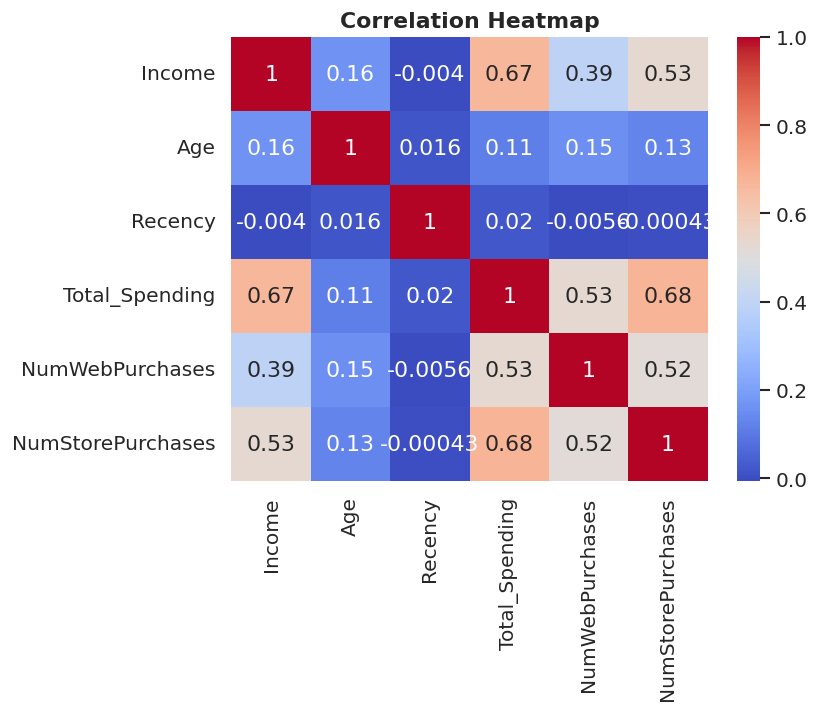

In [30]:
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [31]:
pivot_income = data.pivot_table(index = "Education", columns = "Marital_Status", values = "Income", aggfunc = "mean")

In [32]:
pivot_income

Marital_Status   Absurd    Alone      Divorced       Married        Single  \
Education                                                                    
2n Cycle            NaN      NaN  49395.130435  46201.100000  53673.944444   
Basic               NaN      NaN   9548.000000  21960.500000  18238.666667   
Graduation      79244.0  34176.0  54526.042017  50800.258741  51322.182927   
Master          65487.0  61331.0  50331.945946  53286.028986  53530.560000   
PhD                 NaN  35860.0  53096.615385  58138.031579  53314.614583   

Marital_Status      Together         Widow     YOLO  
Education                                            
2n Cycle        44736.410714  51392.200000      NaN  
Basic           21240.071429  22123.000000      NaN  
Graduation      55758.480702  54976.657143      NaN  
Master          52109.009804  58401.545455      NaN  
PhD             56041.422414  60288.083333  48432.0

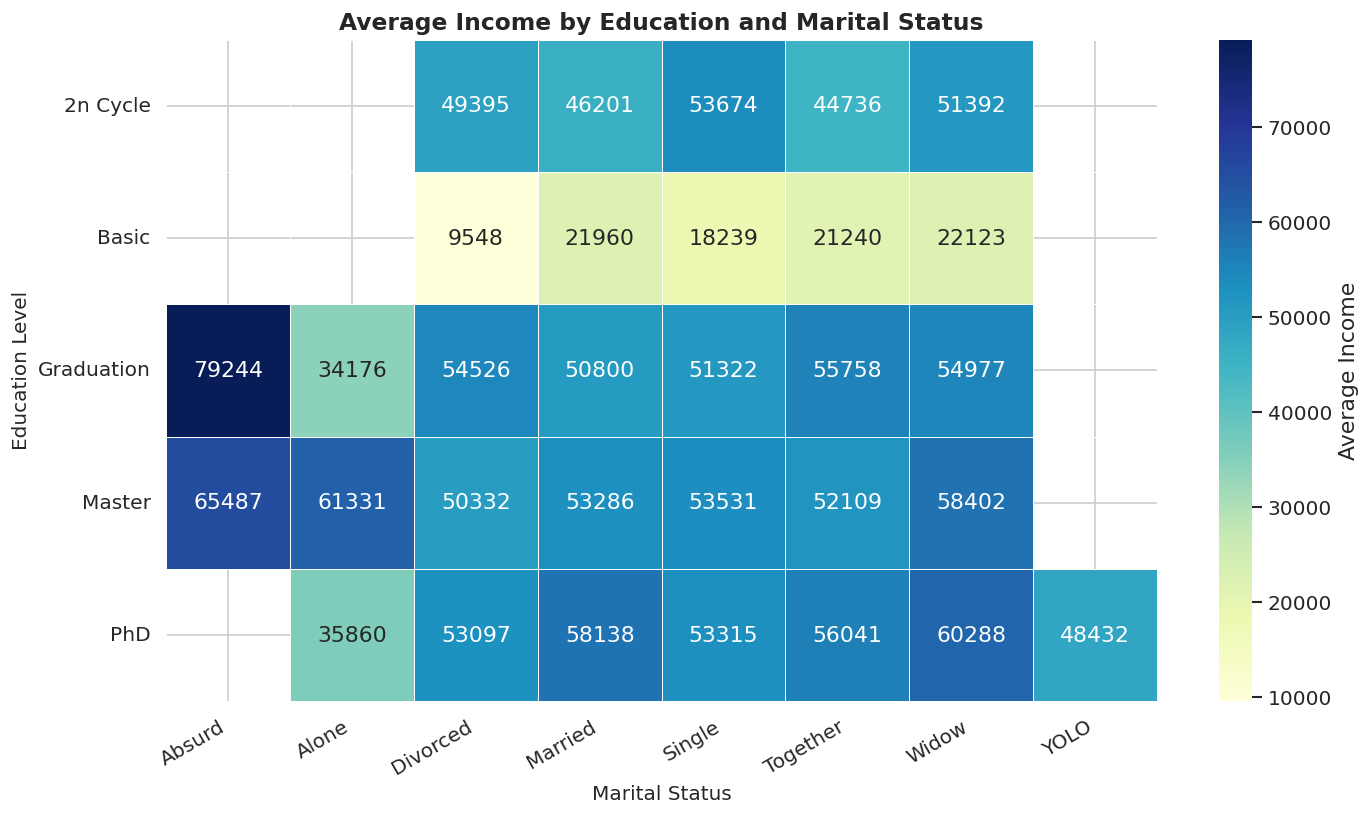

In [33]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    pivot_income,
    annot=True,
    fmt=".0f",   # No scientific notation, round to integer
    cmap="YlGnBu",  # Cleaner colormap (try "mako" or "viridis" too)
    linewidths=0.5,  # Thin lines between cells
    cbar_kws={'label': 'Average Income'}  # Colorbar label
)

plt.title("Average Income by Education and Marital Status", fontsize=14, weight='bold')
plt.xticks(rotation=30, ha="right")  # Rotate x labels for readability
plt.yticks(rotation=0)               # Keep y labels horizontal
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Education Level", fontsize=12)

plt.tight_layout()
plt.show()

In [34]:
group1 = data.groupby("Education")["Total_Spending"].mean().sort_values(ascending = False)

In [35]:
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_Spending, dtype: float64

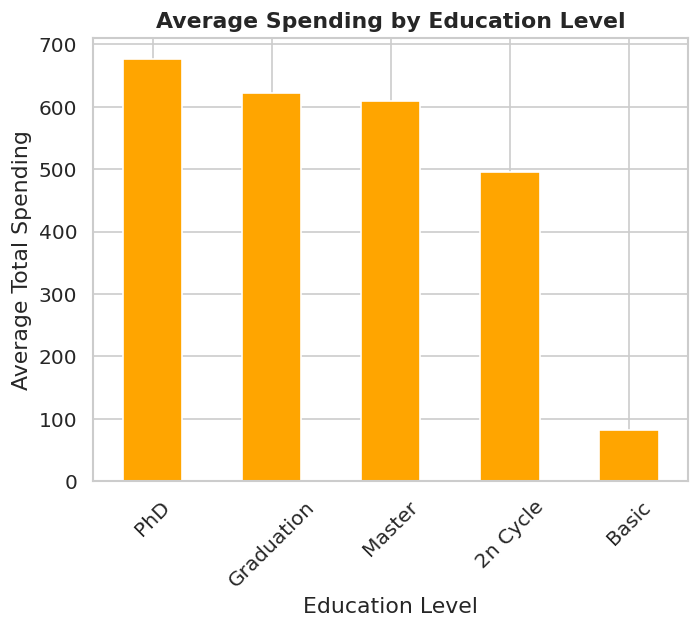

In [36]:
group1.plot(kind = "bar", color = "orange")
plt.title("Average Spending by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Total Spending")
plt.xticks(rotation = 45)
plt.show()

In [37]:
data["AcceptedAny"] = data[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]].any(axis = 1).astype(int)

In [38]:
data["AcceptedAny"].unique()

array([1, 0])

In [39]:
data["AcceptedAny"] = data["AcceptedAny"].apply(lambda x: 1 if x > 0 else 0)

In [40]:
data['AcceptedAny'].unique()

array([1, 0])

In [41]:
group2 = data.groupby("Marital_Status")["AcceptedAny"].mean().sort_values(ascending = False)

In [42]:
group2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: AcceptedAny, dtype: float64

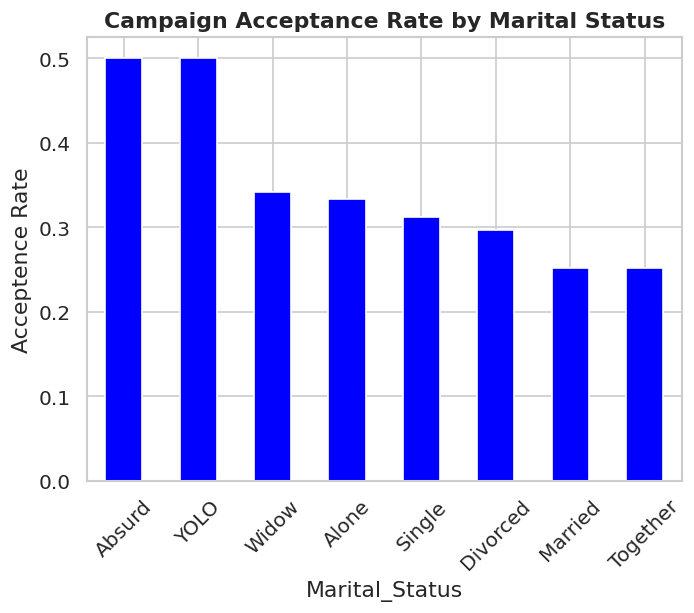

In [43]:
group2.plot(kind = "bar", color = "blue")
plt.title("Campaign Acceptance Rate by Marital Status")
plt.ylabel("Acceptence Rate")
plt.xticks(rotation = 45)
plt.show()

In [44]:
bins = [18, 30, 40, 50, 60, 70, 90]
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70+"]

In [45]:
data["AgeGroup"] = pd.cut(data["Age"], bins = bins, labels = labels)

In [46]:
data['AgeGroup']

0       60-69
1         70+
2       50-59
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: AgeGroup, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [47]:
group3 = data.groupby("AgeGroup")["Income"].mean()

/tmp/ipython-input-588528920.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = data.groupby("AgeGroup")["Income"].mean()


In [48]:
group3

AgeGroup
18-29    46658.000000
30-39    46283.028302
40-49    49224.877034
50-59    50812.913303
60-69    56200.827887
70+      58944.316294
Name: Income, dtype: float64

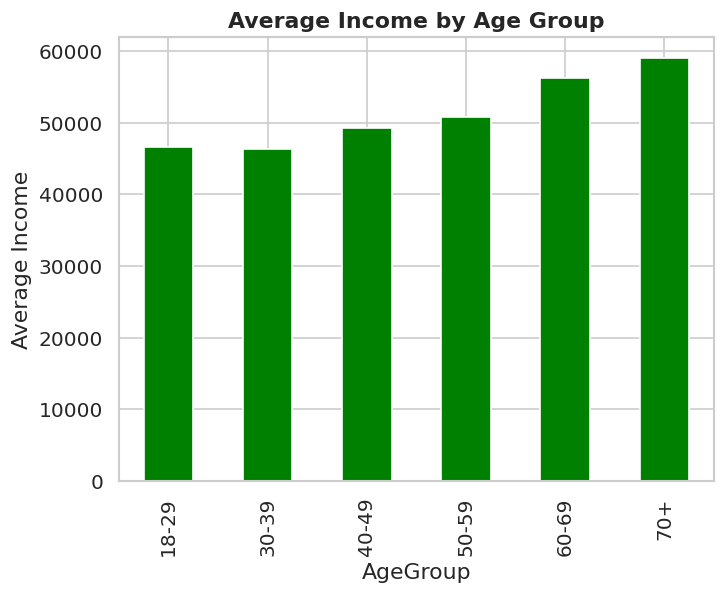

In [49]:
group3.plot(kind = "bar", color = "green")
plt.title("Average Income by Age Group")
plt.ylabel("Average Income")
plt.show()

In [50]:
features = ["Age", "Income", "Total_Spending", "NumWebPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Recency"]

In [51]:
x = data[features].copy()

In [52]:
x

Age   Income  Total_Spending  NumWebPurchases  NumStorePurchases  \
0      68  58138.0            1617                8                  4   
1      71  46344.0              27                1                  2   
2      60  71613.0             776                8                 10   
3      41  26646.0              53                2                  4   
4      44  58293.0             422                5                  6   
...   ...      ...             ...              ...                ...   
2235   58  61223.0            1341                9                  4   
2236   79  64014.0             444                8                  5   
2237   44  56981.0            1241                2                 13   
2238   69  69245.0             843                6                 10   
2239   71  52869.0             172                3                  4   

      NumWebVisitsMonth  Recency  
0                     7       58  
1                     5       38  
2                     4       26  
3                     6       26  
4                     5       94  
...                 ...      ...  
2235                  5       46  
2236                  7       56  
2237                  6       91  
2238                  3        8  
2239                  7       40  

[2216 rows x 7 columns]

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
x_scaled = scaler.fit_transform(x)

In [55]:
x_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]])

In [56]:
from sklearn.cluster import KMeans

In [57]:
wcss = []

In [58]:
for i in range(2, 10):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

In [59]:
wcss

[10218.620143748776,
 9007.786818672812,
 8484.24624218975,
 7635.895904487693,
 7081.156860209052,
 6741.56449426902,
 6299.639575727204,
 6181.862121839807]

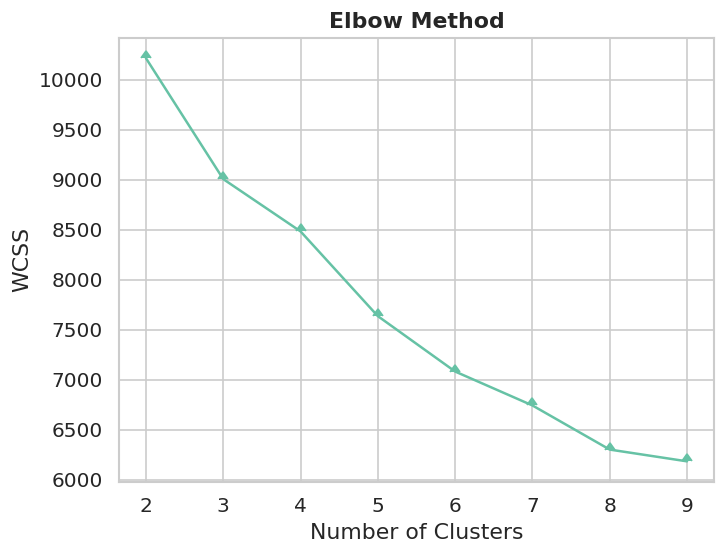

In [60]:
plt.plot(range(2, 10), wcss, marker=10)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [61]:
kmeans = KMeans(n_clusters = 6)
data["Cluster"] = kmeans.fit_predict(x_scaled)

In [62]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Z_CostContact  Z_Revenue  Response  \
0  2012-09-04       58       635  ...              3         11         1   
1  2014-03-08       38        11  ...              3         11         0   
2  2013-08-21       26       426  ...              3         11         0   
3  2014-02-10       26        11  ...              3         11         0   
4  2014-01-19       94       173  ...              3         11         0   

   Age  Total_Children  Total_Spending  Customer_Since  AcceptedAny  AgeGroup  \
0   68               0            1617            4758            1     60-69   
1   71               2              27            4208            0       70+   
2   60               0             776            4407            0     50-59   
3   41               1              53            4234            0     40-49   
4   44               1             422            4256            0     40-49   

   Cluster  
0        1  
1        3  
2        1  
3        5  
4        0  

[5 rows x 36 columns]

In [63]:
cluster_summary = data.groupby("Cluster")[features].mean()

In [64]:
cluster_summary

Age         Income  Total_Spending  NumWebPurchases  \
Cluster                                                              
0        51.700935   34666.528037      132.086449         2.443925   
1        59.407407   61240.919753      932.868313         7.726337   
2        56.175503   77043.217550     1311.758684         4.425960   
3        69.705085   46368.891525      234.840678         2.850847   
4        48.000000  666666.000000       62.000000         3.000000   
5        48.267974   32007.448802      105.664488         2.150327   

         NumStorePurchases  NumWebVisitsMonth    Recency  
Cluster                                                   
0                 3.411215           6.670561  78.492991  
1                 8.279835           6.088477  46.845679  
2                 8.455210           2.372943  51.201097  
3                 4.413559           5.244068  41.172881  
4                 3.000000           6.000000  23.000000  
5                 3.139434           6.801743  26.305011

In [65]:
data["Cluster"].value_counts()

Cluster
2    547
1    486
5    459
0    428
3    295
4      1
Name: count, dtype: int64

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data =pca.fit_transform(x_scaled)
data["PCA1"], data["PCA2"] = pca_data[:, 0], pca_data[:, 1]

In [67]:
pca_data

array([[ 1.1075188 , -0.21175951],
       [-1.33673385,  0.269839  ],
       [ 1.88227676, -1.01416098],
       ...,
       [ 1.1535966 ,  1.15056999],
       [ 1.88768024, -1.16073698],
       [-0.84182091, -0.15963623]])

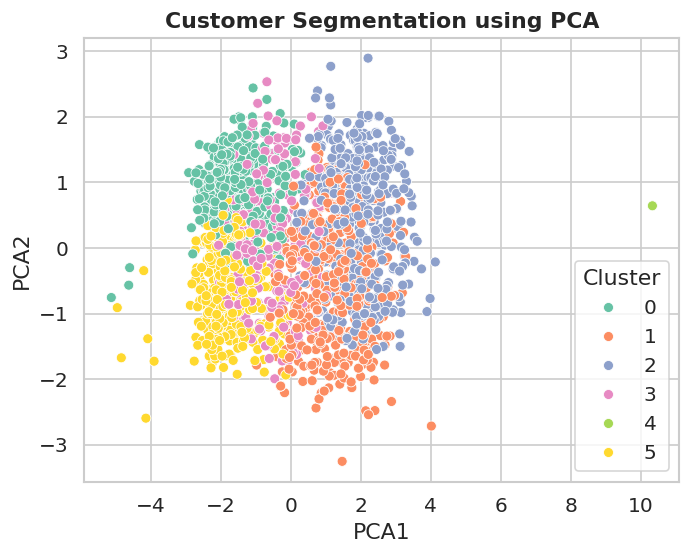

In [68]:
sns.scatterplot(x = "PCA1", y = "PCA2", hue = "Cluster", data = data, palette="Set2")
plt.title("Customer Segmentation using PCA")
plt.show()

# Cluster 0 High Income High Spending
# Cluster 2 High Web Purchases Low Store Purchases
# Cluster 5 Low Recency Inactive
# Cluster 6 Low Income Low Spending

/tmp/ipython-input-1757697842.py:4: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(


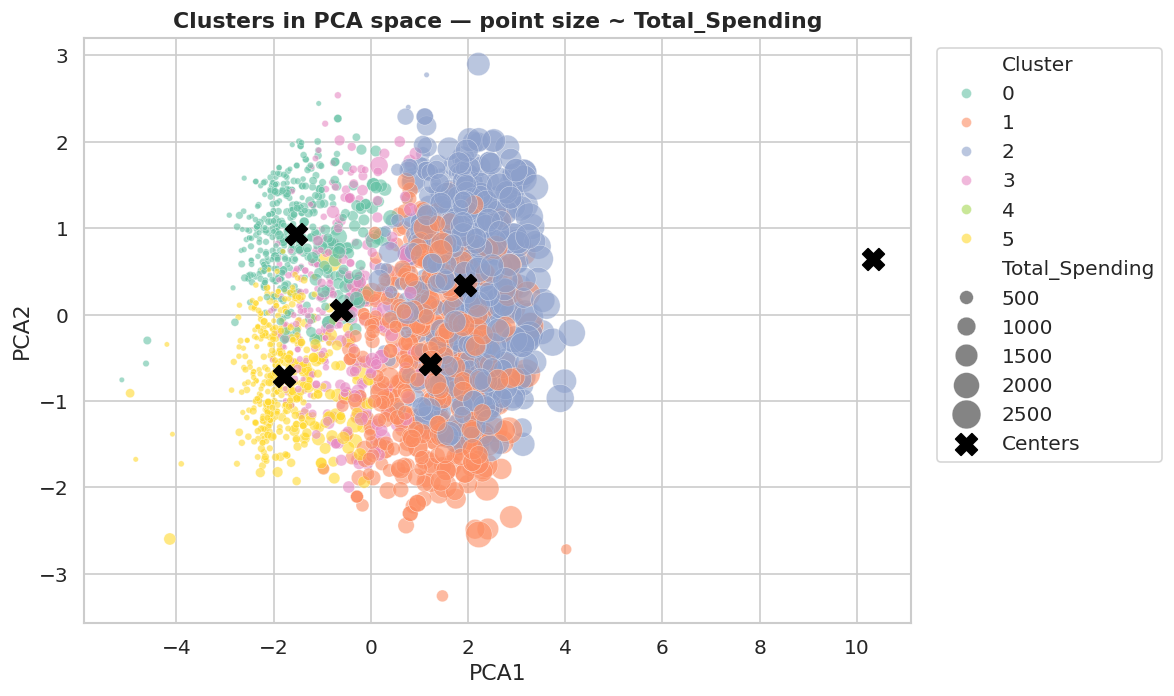

In [69]:
centers_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
sns.scatterplot(
    x="PCA1", y="PCA2", hue="Cluster",
    size="Total_Spending", sizes=(10, 300),  # auto-scales
    data=data, palette=palette, alpha=0.6, legend="brief"
)
plt.scatter(centers_pca[:,0], centers_pca[:,1], marker="X", c="black", s=170, label="Centers")
plt.title("Clusters in PCA space — point size ~ Total_Spending")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seabo

Text(0.5, 1.02, 'Pairwise relationships (sampled)')

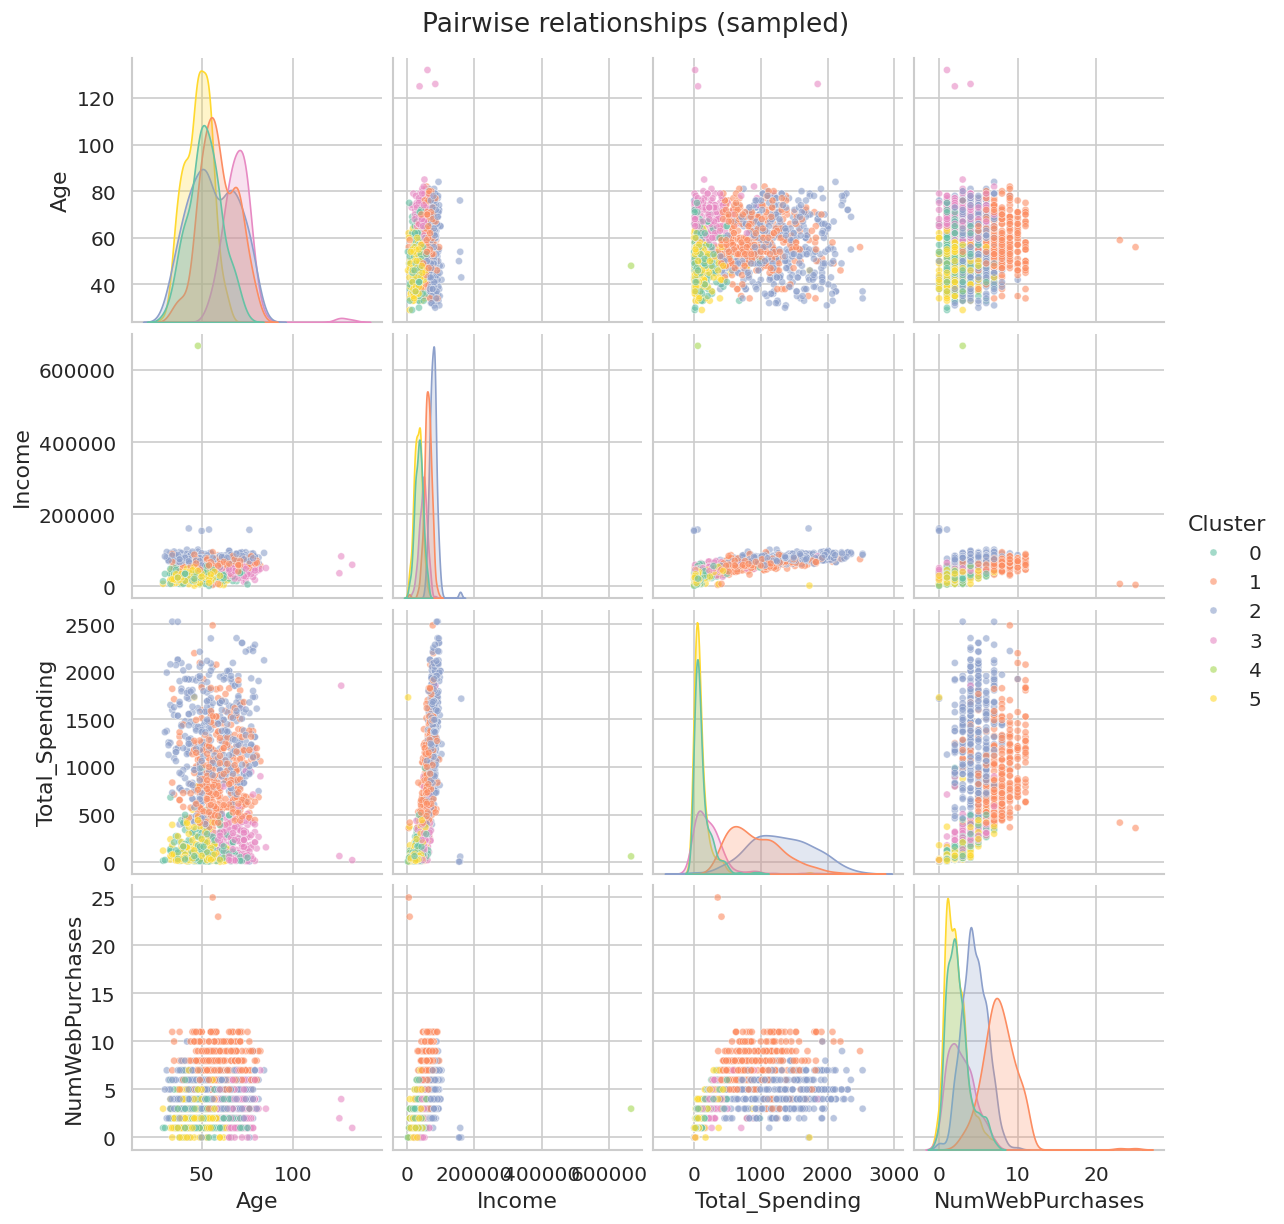

In [70]:
sample = data.sample(n=min(1500, len(data)), random_state=42)  # sample for speed/clarity
sns.pairplot(sample, vars=["Age","Income","Total_Spending","NumWebPurchases"],
             hue="Cluster", palette=palette, diag_kind="kde",
             plot_kws={'alpha':0.6, 's':18})
plt.suptitle("Pairwise relationships (sampled)", y=1.02)

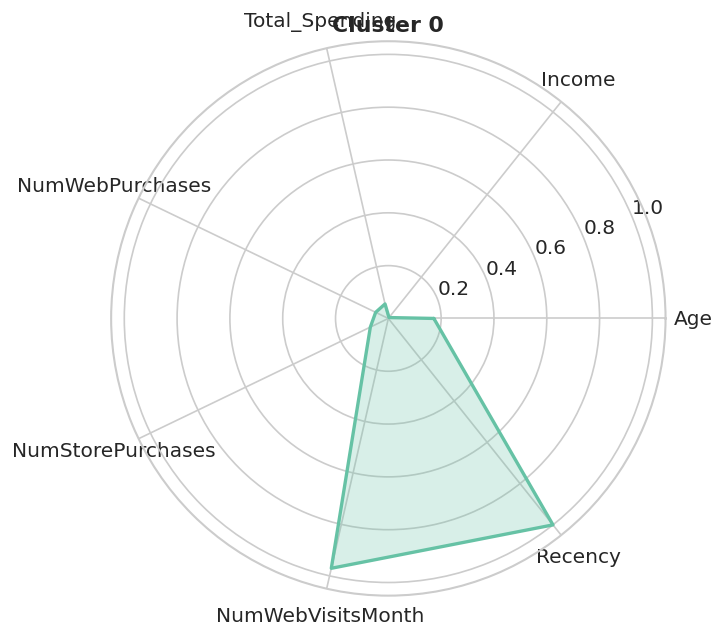

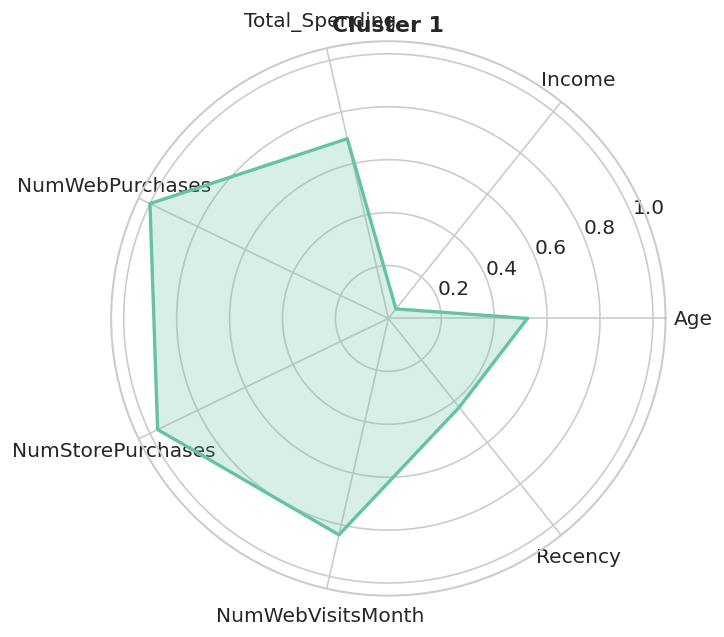

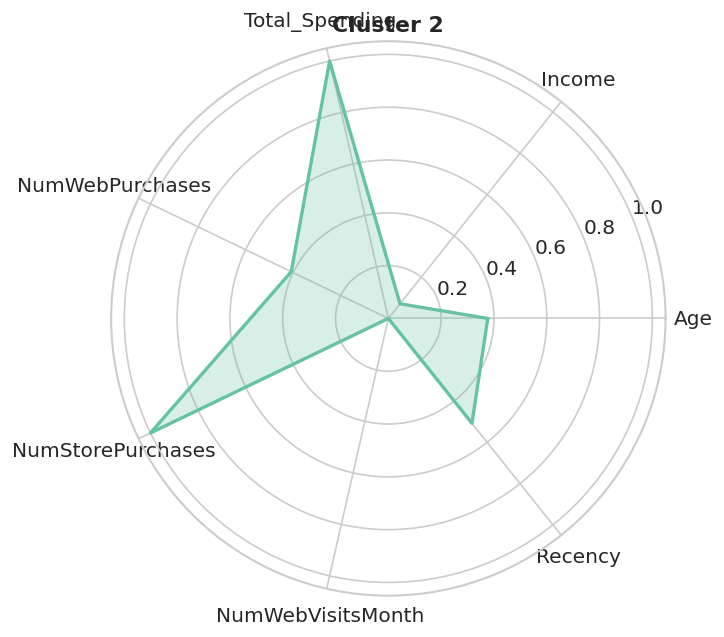

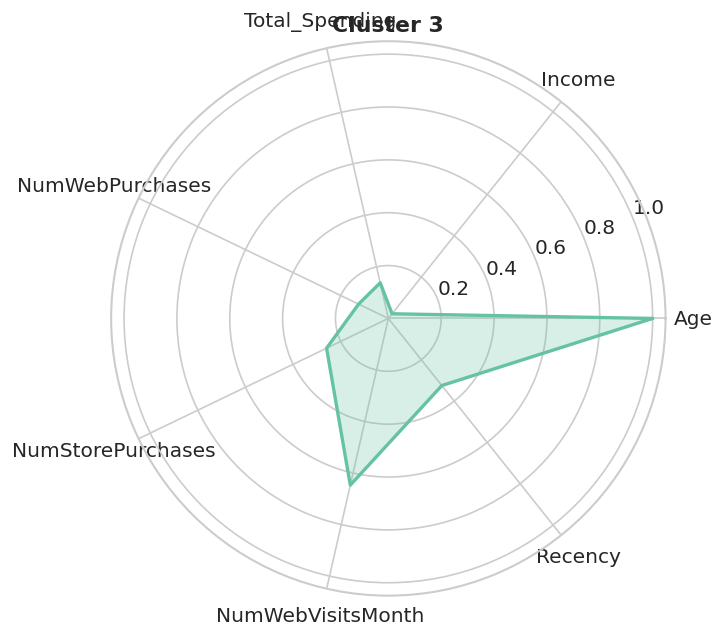

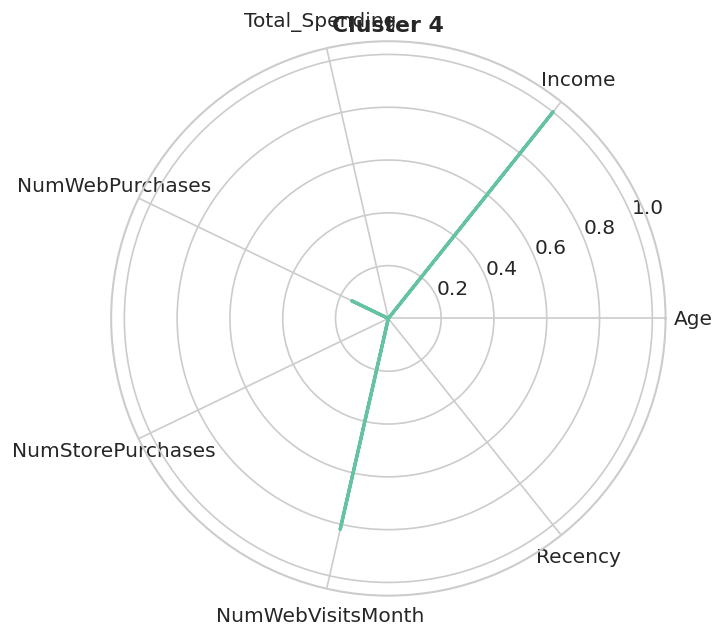

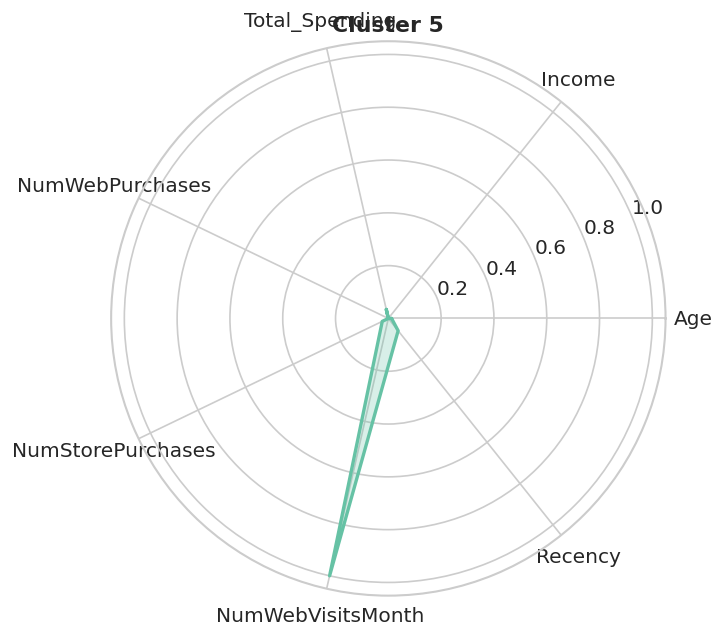

In [71]:
from sklearn.preprocessing import MinMaxScaler
from math import pi

centers_unscaled = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers_unscaled, columns=features)
centers_df.index = [f"Cluster {i}" for i in range(len(centers_df))]

def plot_cluster_radar(centers_df, features, clusters_to_plot=None):
    mm = MinMaxScaler()
    centers_norm = pd.DataFrame(mm.fit_transform(centers_df), index=centers_df.index, columns=centers_df.columns)
    if clusters_to_plot is None:
        clusters_to_plot = centers_norm.index
    for cluster in clusters_to_plot:
        values = centers_norm.loc[cluster].values
        angles = [n / float(len(features)) * 2 * pi for n in range(len(features))]
        values = np.concatenate((values, [values[0]]))
        angles = angles + [angles[0]]
        plt.figure(figsize=(6,6))
        ax = plt.subplot(111, polar=True)
        ax.plot(angles, values, linewidth=2, linestyle='solid')
        ax.fill(angles, values, alpha=0.25)
        ax.set_xticks(angles[:-1]); ax.set_xticklabels(features)
        plt.title(cluster)
        plt.show()

plot_cluster_radar(centers_df, features)

/tmp/ipython-input-2438591188.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Cluster", y="Income", data=data, palette=palette, inner=None)
/tmp/ipython-input-2438591188.py:4: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.violinplot(x="Cluster", y="Income", data=data, palette=palette, inner=None)


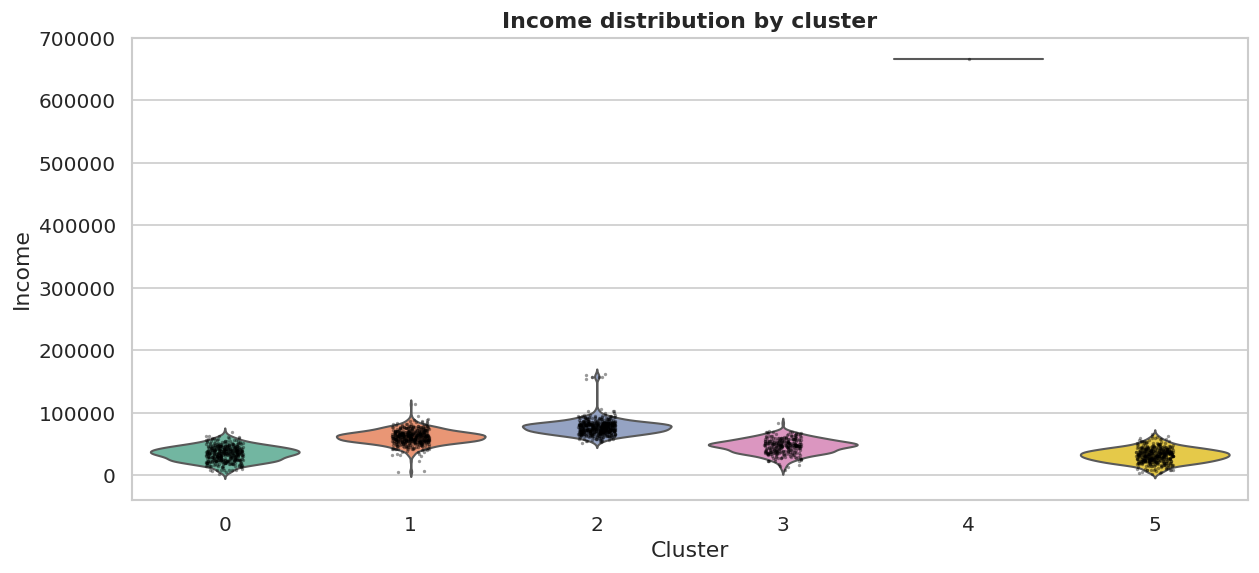

In [72]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12,5))
sns.violinplot(x="Cluster", y="Income", data=data, palette=palette, inner=None)
sns.stripplot(x="Cluster", y="Income", data=data, color="k", size=2, alpha=0.4)
plt.title("Income distribution by cluster")
plt.show()


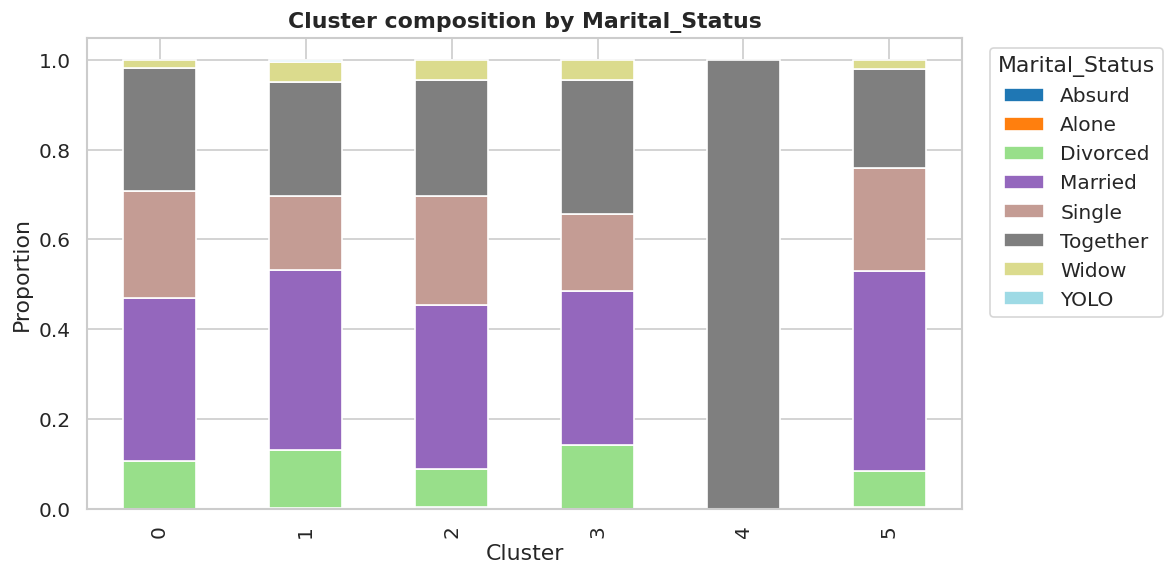

In [73]:
cat = "Marital_Status"
comp = pd.crosstab(data["Cluster"], data[cat], normalize="index")
comp.plot(kind="bar", stacked=True, figsize=(10,5), colormap="tab20")
plt.legend(title=cat, bbox_to_anchor=(1.02,1))
plt.xlabel("Cluster")
plt.ylabel("Proportion")
plt.title(f"Cluster composition by {cat}")
plt.tight_layout()
plt.show()

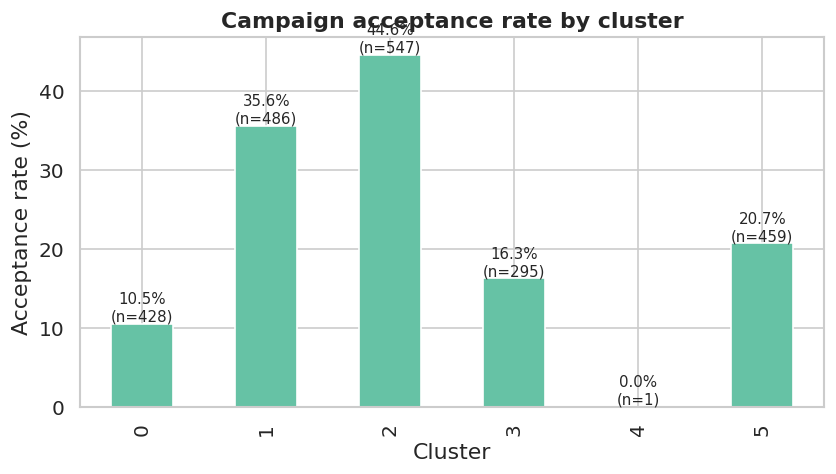

In [74]:
accept_rate = data.groupby("Cluster")["AcceptedAny"].agg(['mean','count']).rename(columns={'mean':'accept_rate','count':'size'})
accept_rate['accept_rate_pct'] = accept_rate['accept_rate']*100
accept_rate['size'] = accept_rate['size']

ax = accept_rate['accept_rate_pct'].plot(kind='bar', figsize=(8,4))
for p, s in zip(ax.patches, accept_rate['size']):
    ax.annotate(f"{p.get_height():.1f}%\n(n={s})", (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9)
plt.ylabel("Acceptance rate (%)")
plt.title("Campaign acceptance rate by cluster")
plt.show()

In [75]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.cm as cm


In [76]:
def evaluate_and_summary(X_scaled, labels, name):
    """Compute silhouette and DB index (if applicable) and print sizes."""
    uniq = np.unique(labels)
    sizes = pd.Series(labels).value_counts().sort_index()
    print(f"\n== {name} ==")
    print("Cluster sizes:\n", sizes.to_string())
    # silhouette requires at least 2 clusters and labels not all same
    if len(uniq) > 1 and (len(uniq) != 1):
        try:
            sil = silhouette_score(X_scaled, labels)
            db = davies_bouldin_score(X_scaled, labels)
            print(f"Silhouette Score: {sil:.4f} | Davies–Bouldin: {db:.4f}")
        except Exception as e:
            print("Could not compute silhouette/db:", e)
    else:
        print("Not enough clusters for silhouette/db.")
    # cluster centers / profile only for labelled clusters (not DBSCAN with noise)
    return sizes

def cluster_profiles(df, labels_col, features, top_n=10):
    """Return cluster means and optionally top N features by mean for each cluster."""
    prof = df.groupby(labels_col)[features].mean()
    prof = prof.round(2)
    return prof

Computing hierarchical linkage (this may take a moment on large datasets)...


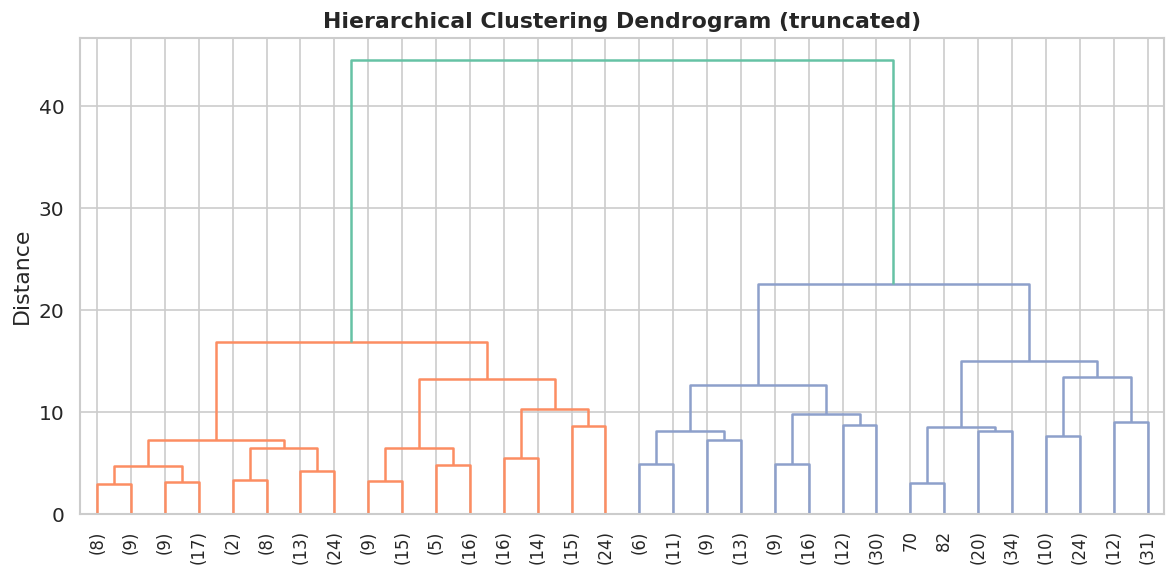


== AgglomerativeClustering ==
Cluster sizes:
 0    692
1    558
2    452
3    301
4      1
5    212
Silhouette Score: 0.1300 | Davies–Bouldin: 1.4234


0    692
1    558
2    452
3    301
4      1
5    212
Name: count, dtype: int64

In [77]:
print("Computing hierarchical linkage (this may take a moment on large datasets)...")
# use a random sample for dendrogram readability if dataset is large
sample_for_dendro = data.sample(frac=0.2, random_state=42) if len(data) > 2000 else data
Z = linkage(scaler.transform(sample_for_dendro[features]), method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='level', p=4, color_threshold=None,
           labels=None, leaf_rotation=90., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# create agglomerative clustering labels (choose n_clusters similar to KMeans)
n_clusters = 6
agg = AgglomerativeClustering(n_clusters=n_clusters)
data['Cluster_Agg'] = agg.fit_predict(x_scaled)
evaluate_and_summary(x_scaled, data['Cluster_Agg'].values, "AgglomerativeClustering")

In [78]:
eps = 0.8
min_samples = 8
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['Cluster_DB'] = dbscan.fit_predict(x_scaled)
# DBSCAN labels: -1 -> noise
evaluate_and_summary(x_scaled, data['Cluster_DB'].values, f"DBSCAN (eps={eps}, min_samples={min_samples})")

# show how many noise points
noise_count = (data['Cluster_DB'] == -1).sum()
print(f"DBSCAN detected {noise_count} noise points (label -1).")


== DBSCAN (eps=0.8, min_samples=8) ==
Cluster sizes:
 -1    1144
 0    1006
 1       8
 2       7
 3      20
 4       8
 5       8
 6       8
 7       7
Silhouette Score: -0.1331 | Davies–Bouldin: 1.8065
DBSCAN detected 1144 noise points (label -1).


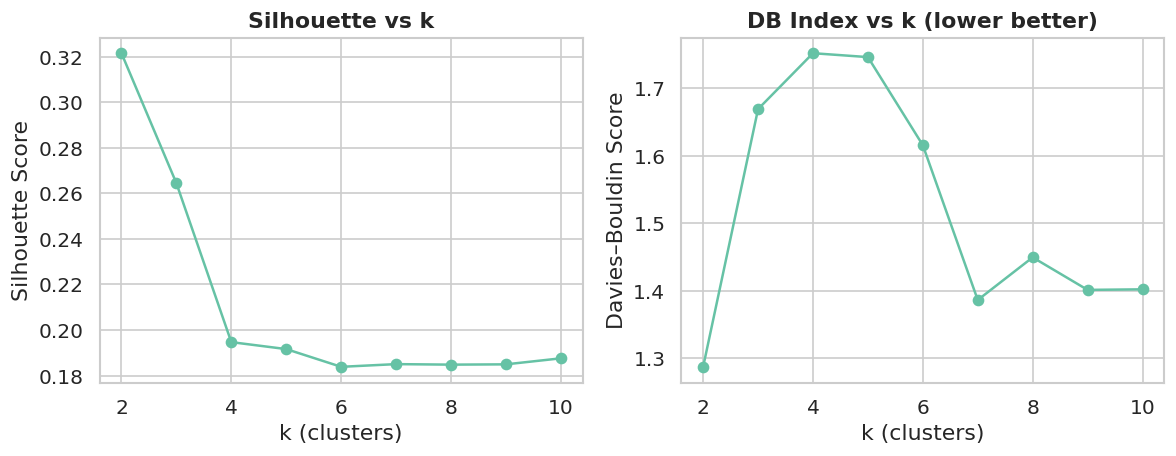

Best k by silhouette: 2

== KMeans (k=2) ==
Cluster sizes:
 0    1158
1    1058
Silhouette Score: 0.3215 | Davies–Bouldin: 1.2871


In [79]:
sil_scores = []
db_scores = []
k_range = range(2, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    lab = km.fit_predict(x_scaled)
    sil = silhouette_score(x_scaled, lab)
    db = davies_bouldin_score(x_scaled, lab)
    sil_scores.append(sil)
    db_scores.append(db)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(list(k_range), sil_scores, marker='o')
plt.xlabel("k (clusters)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette vs k")

plt.subplot(1,2,2)
plt.plot(list(k_range), db_scores, marker='o')
plt.xlabel("k (clusters)")
plt.ylabel("Davies–Bouldin Score")
plt.title("DB Index vs k (lower better)")
plt.tight_layout()
plt.show()

best_k = k_range[int(np.argmax(sil_scores))]
print(f"Best k by silhouette: {best_k}")

kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
data['Cluster_KM_best'] = kmeans_best.fit_predict(x_scaled)
evaluate_and_summary(x_scaled, data['Cluster_KM_best'].values, f"KMeans (k={best_k})")

# store chosen KMeans (you can also keep your previous kmeans with k=6 if you prefer)
kmeans = kmeans_best
data['Cluster_KMeans'] = data['Cluster_KM_best']

In [80]:
print("\nCross-tabulation between KMeans and Agglomerative (counts):")
print(pd.crosstab(data['Cluster_KMeans'], data['Cluster_Agg']))

print("\nCross-tabulation between KMeans and DBSCAN (counts):")
print(pd.crosstab(data['Cluster_KMeans'], data['Cluster_DB']))

# show sizes for quick glance
print("\nCluster sizes summary (KMeans | Agg | DBSCAN):")
sizes = pd.DataFrame({
    'KMeans': data['Cluster_KMeans'].value_counts().sort_index(),
    'Agg': data['Cluster_Agg'].value_counts().sort_index(),
    'DBSCAN': data['Cluster_DB'].value_counts().sort_index()
}).fillna(0).astype(int)
print(sizes)


Cross-tabulation between KMeans and Agglomerative (counts):
Cluster_Agg       0    1    2    3  4    5
Cluster_KMeans                            
0               204    0  452  290  0  212
1               488  558    0   11  1    0

Cross-tabulation between KMeans and DBSCAN (counts):
Cluster_DB       -1    0   1   2   3   4   5   6   7
Cluster_KMeans                                      
0               169  983   0   0   0   6   0   0   0
1               975   23   8   7  20   2   8   8   7

Cluster sizes summary (KMeans | Agg | DBSCAN):
    KMeans  Agg  DBSCAN
-1       0    0    1144
 0    1158  692    1006
 1    1058  558       8
 2       0  452       7
 3       0  301      20
 4       0    1       8
 5       0  212       8
 6       0    0       8
 7       0    0       7



KMeans Cluster Profiles (means):
                   Age    Income  Total_Spending  NumWebPurchases  \
Cluster_KMeans                                                     
0               54.05  35726.88          136.25             2.51   
1               58.51  70329.10         1122.41             5.81   

                NumStorePurchases  NumWebVisitsMonth  Recency  
Cluster_KMeans                                                 
0                            3.44               6.54    48.72  
1                            8.38               3.99    49.33  

Agglomerative Cluster Profiles (means):
                Age     Income  Total_Spending  NumWebPurchases  \
Cluster_Agg                                                      
0            57.72   57435.77          730.00             6.38   
1            57.78   76682.84         1344.66             4.92   
2            47.93   30434.68           81.05             1.90   
3            67.97   40816.30          128.88             2.08  

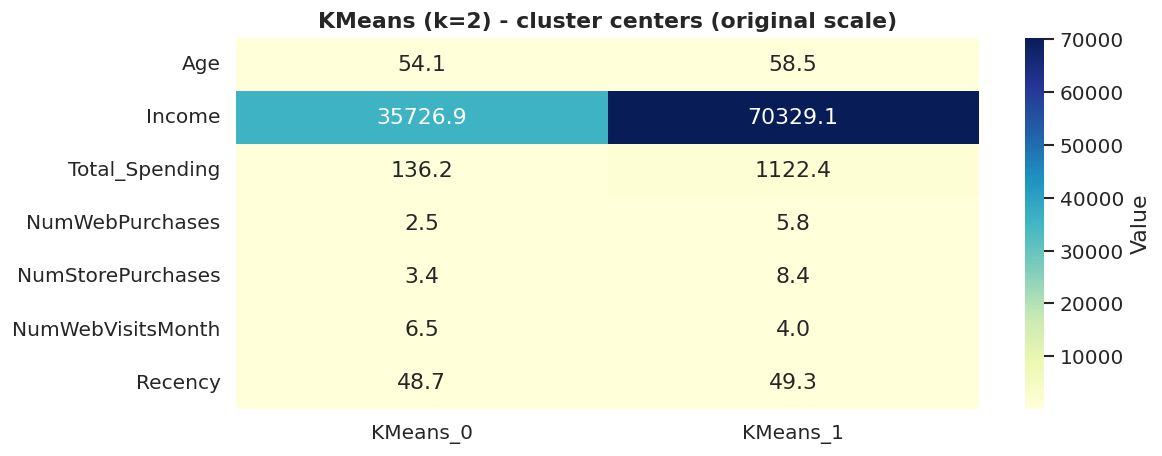

In [81]:
prof_km = cluster_profiles(data, 'Cluster_KMeans', features)
prof_agg = cluster_profiles(data, 'Cluster_Agg', features)
# for DBSCAN, exclude noise (-1) or include as its own group
prof_db = cluster_profiles(data[data['Cluster_DB'] != -1], 'Cluster_DB', features)

print("\nKMeans Cluster Profiles (means):\n", prof_km)
print("\nAgglomerative Cluster Profiles (means):\n", prof_agg)
print("\nDBSCAN Cluster Profiles (means) [excluding noise]:\n", prof_db)

# Visual: heatmap of KMeans cluster centers (unscaled, original feature units)
centers_unscaled = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers_unscaled, columns=features)
centers_df.index = [f"KMeans_{i}" for i in range(len(centers_df))]

plt.figure(figsize=(10,4))
sns.heatmap(centers_df.T, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label':'Value'})
plt.title(f"KMeans (k={best_k}) - cluster centers (original scale)")
plt.tight_layout()
plt.show()


In [82]:
# Combine cluster summaries into one table for comparison
cluster_summary_kmeans = data.groupby("Cluster_KMeans")[features].mean().round(2)
cluster_summary_agg = data.groupby("Cluster_Agg")[features].mean().round(2)
cluster_summary_db = data.groupby("Cluster_DB")[features].mean().round(2)

print("=== KMeans Cluster Profiles ===")
display(cluster_summary_kmeans)
print("\n=== Agglomerative Cluster Profiles ===")
display(cluster_summary_agg)
print("\n=== DBSCAN Cluster Profiles (excl. noise) ===")
display(cluster_summary_db)

=== KMeans Cluster Profiles ===


Age    Income  Total_Spending  NumWebPurchases  \
Cluster_KMeans                                                     
0               54.05  35726.88          136.25             2.51   
1               58.51  70329.10         1122.41             5.81   

                NumStorePurchases  NumWebVisitsMonth  Recency  
Cluster_KMeans                                                 
0                            3.44               6.54    48.72  
1                            8.38               3.99    49.33


=== Agglomerative Cluster Profiles ===


Age     Income  Total_Spending  NumWebPurchases  \
Cluster_Agg                                                      
0            57.72   57435.77          730.00             6.38   
1            57.78   76682.84         1344.66             4.92   
2            47.93   30434.68           81.05             1.90   
3            67.97   40816.30          128.88             2.08   
4            48.00  666666.00           62.00             3.00   
5            47.83   30832.49           67.48             1.89   

             NumStorePurchases  NumWebVisitsMonth  Recency  
Cluster_Agg                                                 
0                         7.62               5.91    49.13  
1                         8.19               2.63    49.65  
2                         2.96               6.87    31.37  
3                         3.54               5.54    51.00  
4                         3.00               6.00    23.00  
5                         2.86               6.84    81.88


=== DBSCAN Cluster Profiles (excl. noise) ===


Age    Income  Total_Spending  NumWebPurchases  \
Cluster_DB                                                     
-1          57.96  66602.98         1024.49             5.38   
 0          53.94  35174.70          117.69             2.42   
 1          69.00  76407.38         1218.62             3.25   
 2          62.00  59777.14          597.29             7.14   
 3          55.25  61563.15          852.20             8.05   
 4          63.62  53564.38          388.75             4.75   
 5          63.38  68333.25          952.62             8.12   
 6          51.25  68384.62          938.62             6.88   
 7          58.29  59590.29          808.43             9.00   

            NumStorePurchases  NumWebVisitsMonth  Recency  
Cluster_DB                                                 
-1                       7.78               4.22    48.71  
 0                       3.32               6.59    49.29  
 1                       9.88               1.25    65.38  
 2                       7.43               5.14    35.00  
 3                       9.90               5.60    58.20  
 4                       6.12               5.88    94.62  
 5                      11.12               4.88    37.88  
 6                      12.38               4.25    14.38  
 7                       6.71               7.29    27.14

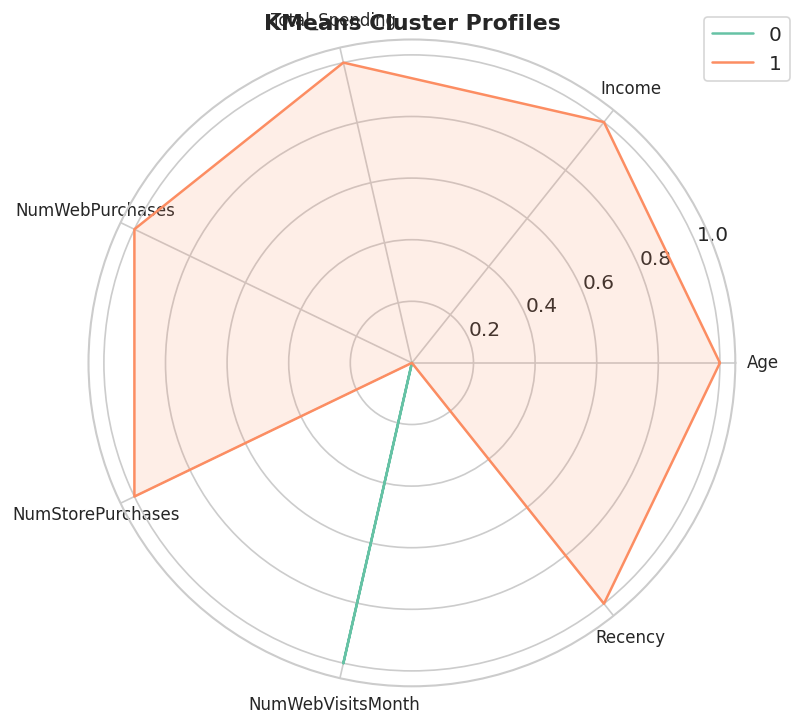

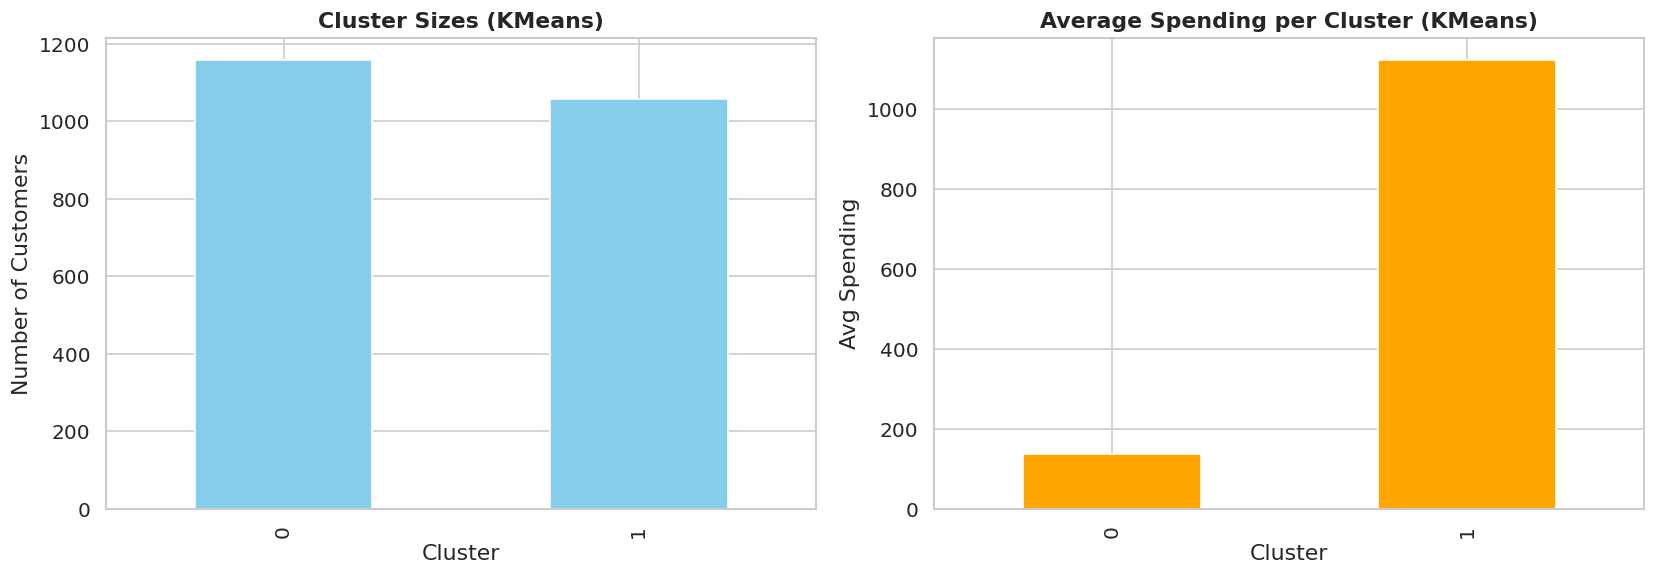

In [83]:
def plot_cluster_radar(centers_df, title):
    mm = MinMaxScaler()
    centers_norm = pd.DataFrame(mm.fit_transform(centers_df),
                                index=centers_df.index, columns=centers_df.columns)
    angles = np.linspace(0, 2*np.pi, len(features), endpoint=False).tolist()
    angles += angles[:1]

    plt.figure(figsize=(7,7))
    ax = plt.subplot(111, polar=True)

    for i, row in centers_norm.iterrows():
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, label=i)
        ax.fill(angles, values, alpha=0.15)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=10)
    plt.title(title, weight="bold")
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()

# Example: radar chart for KMeans clusters
plot_cluster_radar(cluster_summary_kmeans, "KMeans Cluster Profiles")

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Cluster sizes
data["Cluster_KMeans"].value_counts().sort_index().plot(kind="bar", ax=axes[0], color="skyblue")
axes[0].set_title("Cluster Sizes (KMeans)")
axes[0].set_xlabel("Cluster")
axes[0].set_ylabel("Number of Customers")

# Avg spending by cluster
data.groupby("Cluster_KMeans")["Total_Spending"].mean().plot(kind="bar", ax=axes[1], color="orange")
axes[1].set_title("Average Spending per Cluster (KMeans)")
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Avg Spending")

plt.tight_layout()
plt.show()

In [84]:
persona_labels = {
    0: "Budget-Conscious Families (low income, low spending)",
    1: "Premium Shoppers (high income, high spending)",
    2: "Dormant Customers (older, inactive, low spending)",
    3: "Digital Savvy (younger, high online activity)",
    4: "At-Risk Seniors (older, moderate income, inactive)",
    5: "Big Basket Shoppers (frequent, loyal, high spending)"
}

persona_strategies = {
    0: "Target with discounts, bundle offers, loyalty points",
    1: "Exclusive VIP deals, early access, premium experiences",
    2: "Reactivation campaigns (emails, coupons, SMS)",
    3: "Push mobile app offers, digital campaigns, flash sales",
    4: "Retention strategies, personalized outreach, phone calls",
    5: "Upsell premium products, cross-sell complementary goods"
}

# Example for KMeans personas
final_report = pd.DataFrame({
    "Cluster": cluster_summary_kmeans.index,
    "Persona": [persona_labels.get(c, "Other") for c in cluster_summary_kmeans.index],
    "Strategy": [persona_strategies.get(c, "Explore further") for c in cluster_summary_kmeans.index],
    "Size": data["Cluster_KMeans"].value_counts().sort_index().values,
    "Avg_Spending": cluster_summary_kmeans["Total_Spending"].values.round(0)
})

display(final_report)

Cluster                                            Persona  \
0        0  Budget-Conscious Families (low income, low spe...   
1        1      Premium Shoppers (high income, high spending)   

                                            Strategy  Size  Avg_Spending  
0  Target with discounts, bundle offers, loyalty ...  1158         136.0  
1  Exclusive VIP deals, early access, premium exp...  1058        1122.0

In [85]:
print("📊 Business Interpretation")
for i, row in final_report.iterrows():
    print(f"""
    Cluster {row['Cluster']} → {row['Persona']}
    - Size: {row['Size']} customers
    - Avg Spending: {row['Avg_Spending']}
    - Recommended Strategy: {row['Strategy']}
    """)

📊 Business Interpretation

    Cluster 0 → Budget-Conscious Families (low income, low spending)
    - Size: 1158 customers
    - Avg Spending: 136.0
    - Recommended Strategy: Target with discounts, bundle offers, loyalty points
    

    Cluster 1 → Premium Shoppers (high income, high spending)
    - Size: 1058 customers
    - Avg Spending: 1122.0
    - Recommended Strategy: Exclusive VIP deals, early access, premium experiences
    


In [86]:
def plot_cluster_summary(data, labels, algo_name, features, x_scaled, pca_model):
    """
    Plots cluster summary for any clustering algorithm.

    Parameters:
    -----------
    data : pd.DataFrame
        Original customer dataset (with Total_Spending column)
    labels : array-like
        Cluster labels from algorithm
    algo_name : str
        Algorithm name (e.g. "KMeans", "Agglomerative", "DBSCAN")
    features : list
        Features used for clustering
    x_scaled : ndarray
        Standardized feature matrix
    pca_model : fitted PCA object (with n_components=2)
    """

    # Handle DBSCAN noise (-1)
    mask = labels != -1 if -1 in labels else np.ones_like(labels, dtype=bool)
    filtered_labels = labels[mask]
    filtered_data = data.loc[mask].copy()

    # Cluster profiles
    cluster_profiles = filtered_data.groupby(filtered_labels)[features].mean()

    # Validation scores (only if >1 cluster)
    sil, dbi = None, None
    if len(np.unique(filtered_labels)) > 1:
        sil = silhouette_score(x_scaled[mask], filtered_labels)
        dbi = davies_bouldin_score(x_scaled[mask], filtered_labels)

    # PCA scatter
    pca_data = pca_model.transform(x_scaled[mask])
    filtered_data["PCA1"], filtered_data["PCA2"] = pca_data[:, 0], pca_data[:, 1]
    filtered_data["Cluster"] = filtered_labels

    # Create figure
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # 1. PCA Scatter
    sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=filtered_data,
                    palette="Set2", alpha=0.6, s=50, ax=axes[0])
    axes[0].set_title(f"{algo_name} PCA Scatter\n(Sil={sil:.2f}, DBI={dbi:.2f})" if sil else f"{algo_name} PCA Scatter")

    # 2. Cluster Sizes
    size_counts = pd.Series(filtered_labels).value_counts().sort_index()
    size_counts.plot(kind="bar", color="skyblue", ax=axes[1])
    axes[1].set_title(f"Cluster Sizes ({algo_name})")
    axes[1].set_xlabel("Cluster")
    axes[1].set_ylabel("Number of Customers")

    # 3. Avg Spending per Cluster
    avg_spending = filtered_data.groupby("Cluster")["Total_Spending"].mean()
    avg_spending.plot(kind="bar", color="orange", ax=axes[2])
    axes[2].set_title(f"Average Spending per Cluster ({algo_name})")
    axes[2].set_xlabel("Cluster")
    axes[2].set_ylabel("Avg Spending")

    plt.tight_layout()
    plt.show()

    return cluster_profiles

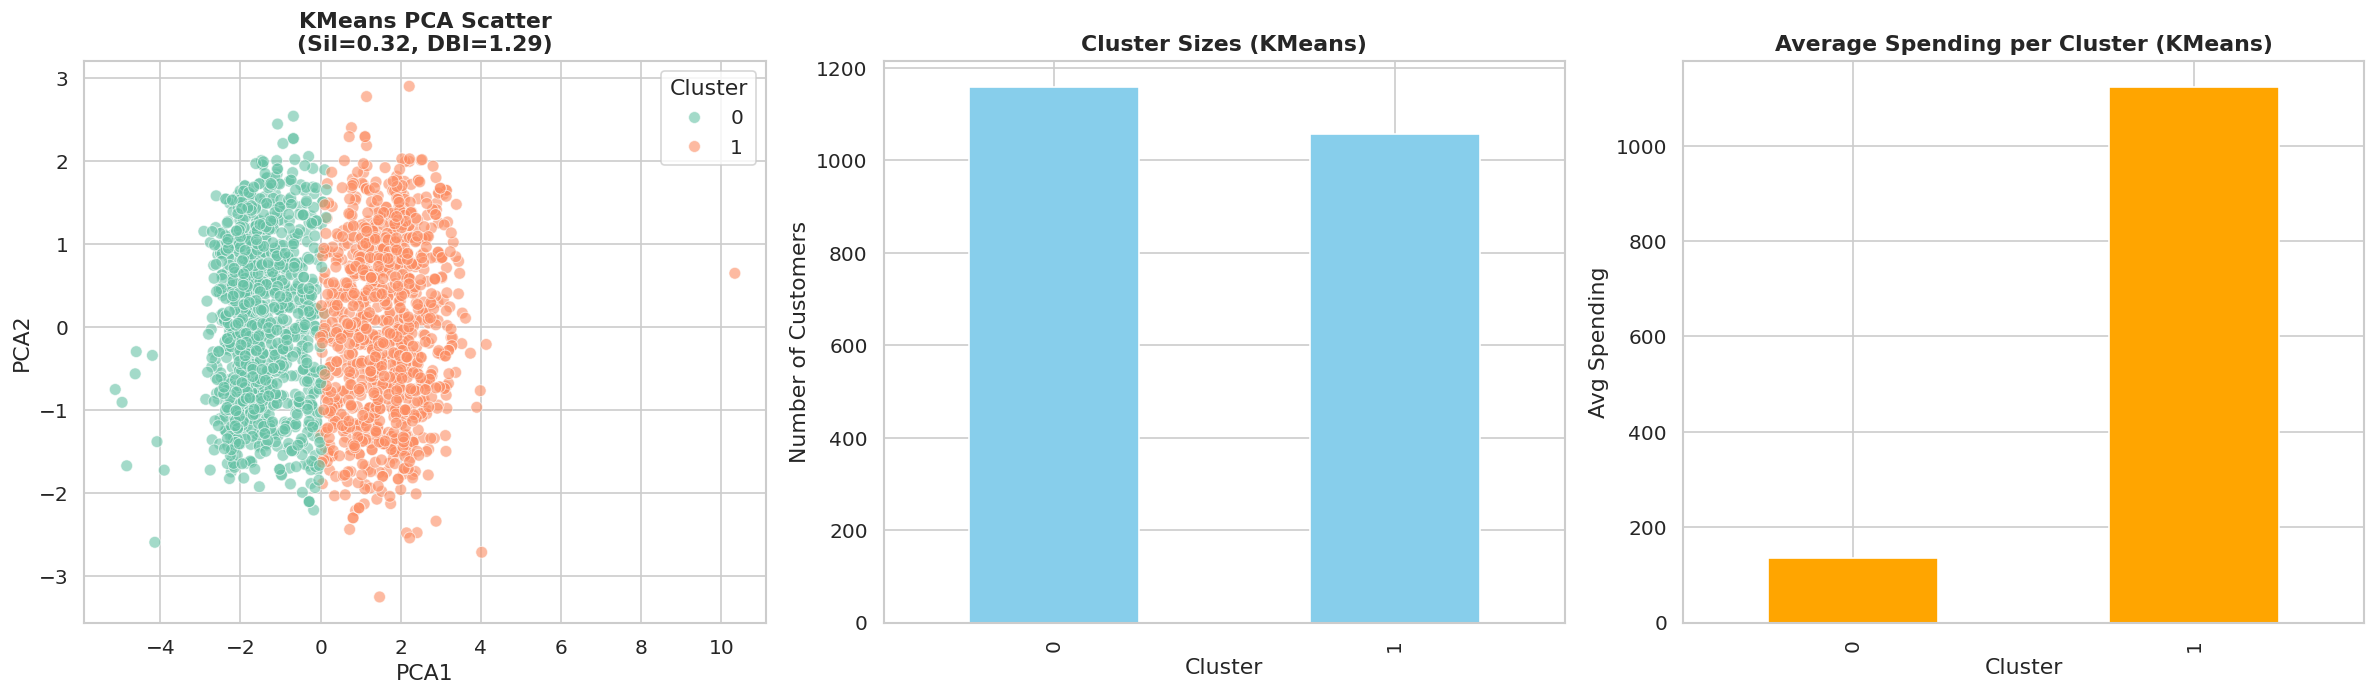

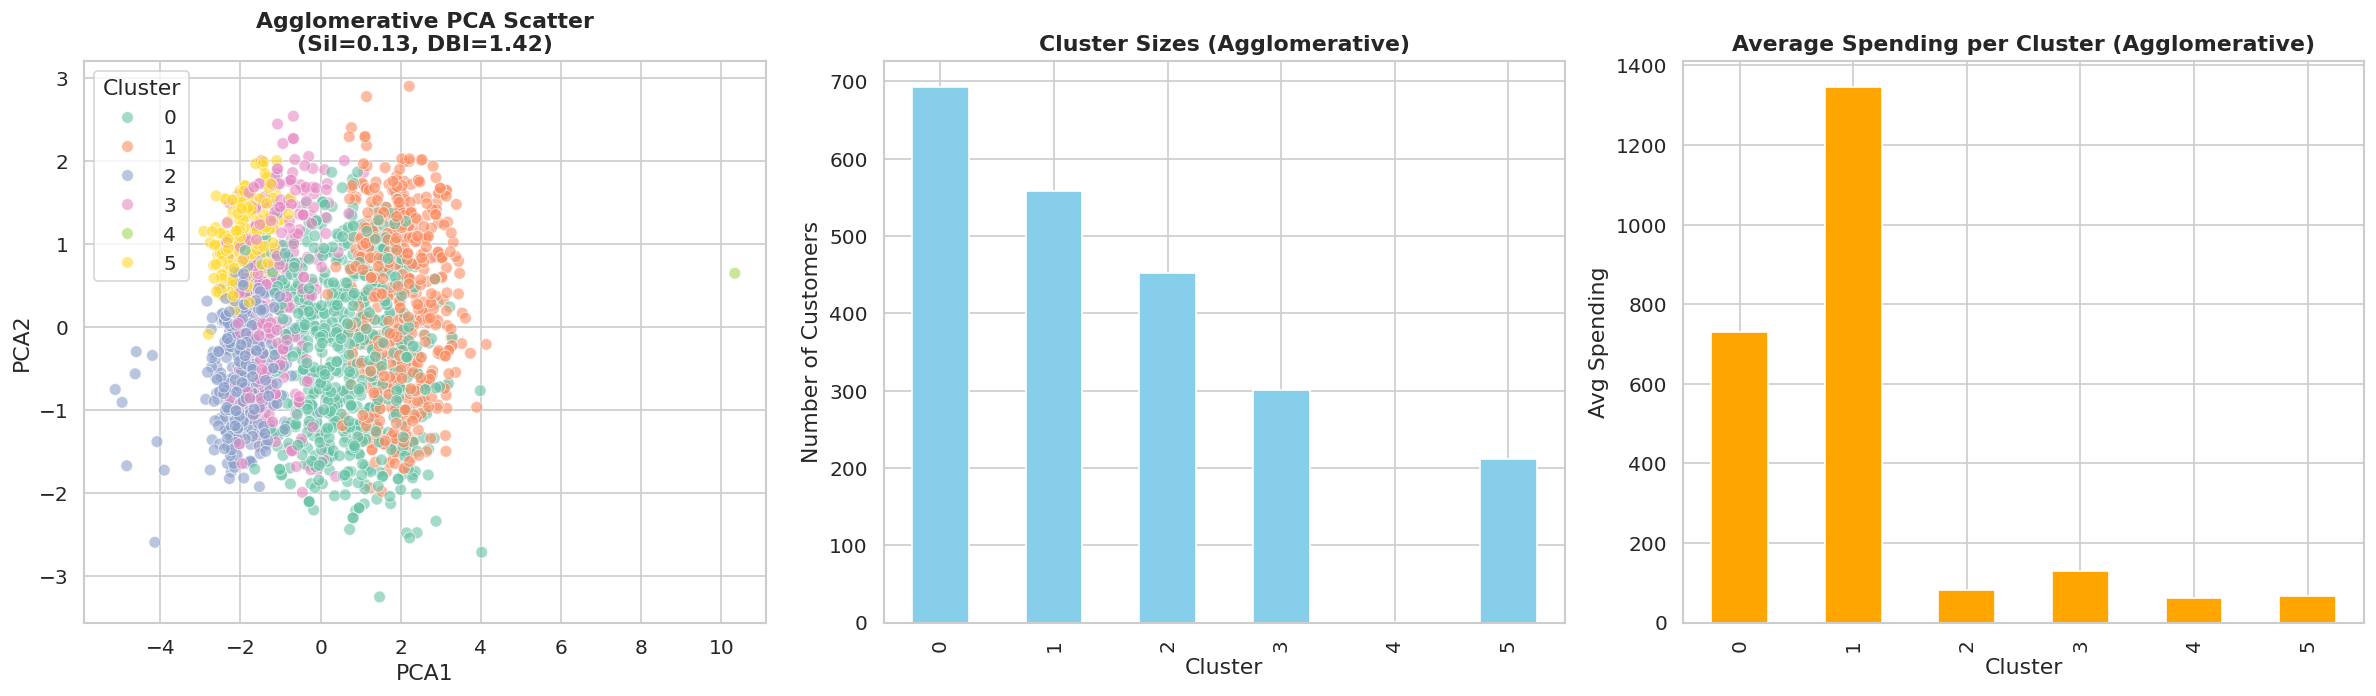

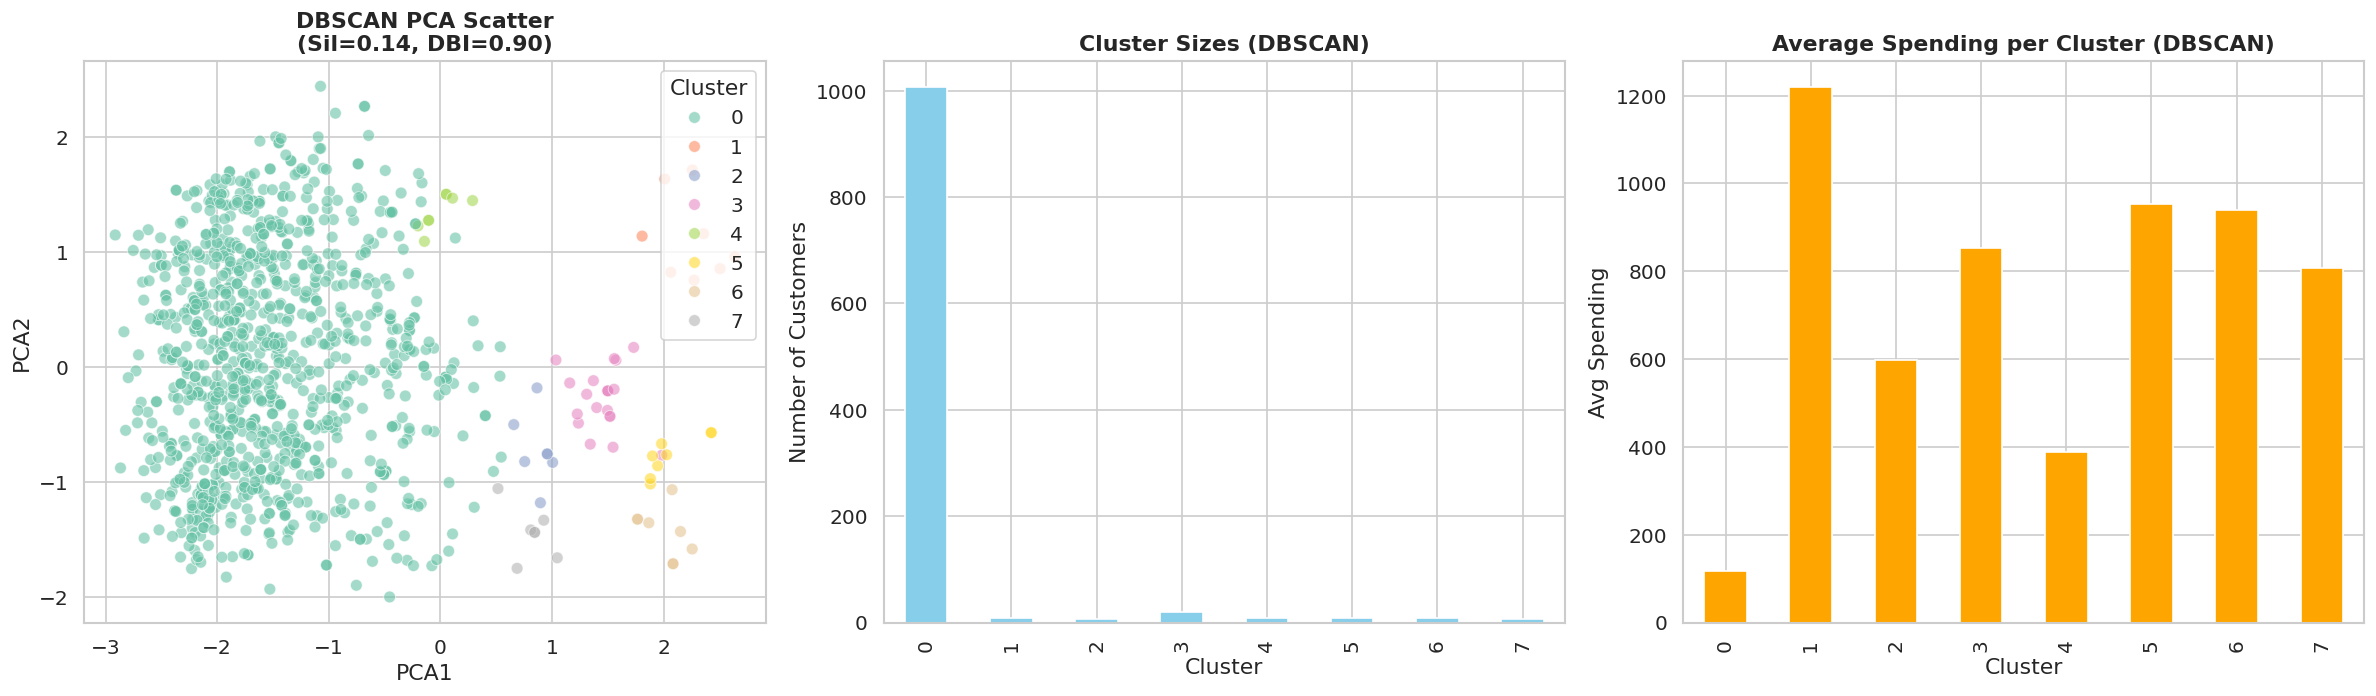

In [90]:
profiles_kmeans = plot_cluster_summary(data, data['Cluster_KMeans'].values, "KMeans", features, x_scaled, pca)
profiles_agg = plot_cluster_summary(data, data['Cluster_Agg'].values, "Agglomerative", features, x_scaled, pca)
profiles_db = plot_cluster_summary(data, data['Cluster_DB'].values, "DBSCAN", features, x_scaled, pca)

In [87]:
import joblib

joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [88]:
# Write the Streamlit code to a file
with open("app.py", "w") as f:
    f.write("""
import streamlit as st
import pandas as pd
import joblib

# Load the scaler and kmeans model
scaler = joblib.load("scaler.pkl")
kmeans = joblib.load("kmeans_model.pkl")

st.title("Customer Segmentation App")
st.write("Enter customer details to predict the segment")

age = st.number_input("Age", min_value=18, max_value=100, value=30)
income = st.number_input("Income", min_value=0, value=50000)
total_spending = st.number_input("Total Spending", min_value=0, value=1000)
num_web_purchases = st.number_input("Number of Web Purchases", min_value=0, value=5)
num_store_purchases = st.number_input("Number of Store Purchases", min_value=0, value=3)
num_web_visits = st.number_input("Number of Web Visits", min_value=0, value=10)
recency = st.number_input("Recency", min_value=0, value=30)

input_data = pd.DataFrame({
    "Age": [age],
    "Income": [income],
    "Total_Spending": [total_spending],
    "NumWebPurchases": [num_web_purchases],
    "NumStorePurchases": [num_store_purchases],
    "NumWebVisitsMonth": [num_web_visits],
    "Recency": [recency]
})

input_scaled = scaler.transform(input_data)

if st.button("Predict"):
    cluster = kmeans.predict(input_scaled)
    st.write(f"The predicted cluster is: {cluster[0]}")
""")